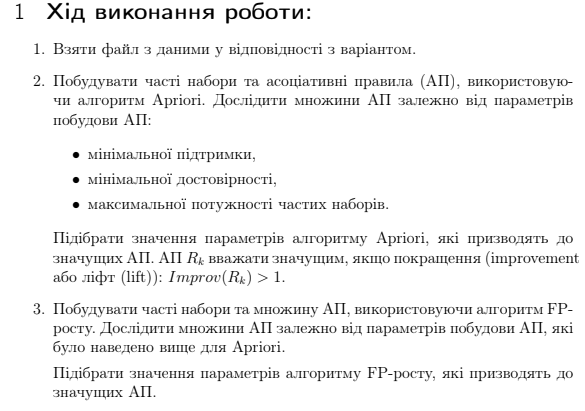
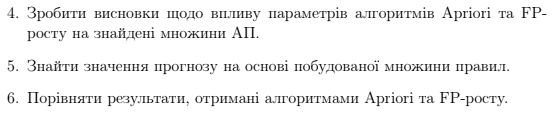

### 14 Варіант

Ассоциативные правила представляют собой механизм нахождения логических закономерностей между связанными элементами (событиями или объектами). Пусть имеется $\mathbf{A} = \{a_1, a_2, a_3, \dots, a_n\}$ - конечное множество уникальных элементов (list of items). Из этих компонентов может быть составлено множество наборов C (sets of items), т.е. ${C} \subseteq \mathbf{A}$.  

Ассоциативные правила $\mathcal{A} \rightarrow {C}$
имеют следующий вид: `если <условие> то <результат>`, где `<условие>` - а набор объектов из множества A, с которыми связаны (ассоциированы) объекты того же множества, включенные в `<результат>` данного правила.   

Поиск ассоциативных правил обычно выполняют в два этапа:

- в пуле имеющихся признаков $A$ находят наиболее часто встречающиеся комбинации элементов $C$;
- из этих найденных наиболее часто встречающихся наборов формируют ассоциативные правила.  

### Что такое олгоритм Apriori?
Простой алгоритм Apriori состоит из трех шагов:

**Формальное определения алгоритма Apriori:** 
1. Построение множества одноэлементных частых наборов: $L_1 = ${$i | i ∈ I, Supp(i) ≥ Supp_{min}$};
2. Для всех $k = 2, ..., n$ генерируем k-элементные частые наборы $L_k =$
{$F ∪ $ {$i$} $| F ∈ L_{k-1}, i ∈ L_1 \ F, Supp (F ∪ ${ $i $}$) ≥ Supp_{min}$};
3. Если $L_k = ∅$, то выходим из цикла по k.    

На первом шаге берем одноэлементные частые наборы $L_1$. Далее добавляем к ним по одному
объекта, то есть формируем двухэлементные множества и так далее.Редкие наборы мы отвергаем и так постепенно наращиваем мощность наборов, фильтруя от нечастых наборов.  
Объем перебора существенно зависит от параметра $Supp_{min}$:
если значение $Supp_{min}$ уменьшаем, то количество частых наборов будет больше, если $Supp_{min}$ увеличиваем - то меньше. 
На втором шаге ищем частые наборы мощностью k, при условии, что частые наборы мощности k - 1 нам известны. 
Берем по одному элементу $F$ с $k - 1$ -елементного частого набора $L_{k-1}$, и по одному объекту i из множества $L_1$ без F и стараемся их объединить. Если $Supp(F ∪ ${$i$}$) ≥ Supp_{min}$, то записываем это объединение в $L_k$.  
На третьем шаге, если не нашли частого набора мощности k, то выходим из цикла по k, так как уже частого набора в дальнейшем не получим.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns  import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("Var_6_1000_Transactions.csv")
df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
9715,1000,35951
9716,1000,3025
9717,1000,35734
9718,1000,26800


In [3]:
order_df = df.groupby("order_id").product_id.agg(list)
order_df

order_id
2       [33120, 28985, 9327, 45918, 30035, 17794, 4014...
3       [33754, 24838, 17704, 21903, 17668, 46667, 174...
4       [46842, 26434, 39758, 27761, 10054, 21351, 225...
5       [13176, 15005, 47329, 27966, 23909, 48370, 132...
6                                   [40462, 15873, 41897]
                              ...                        
996                                               [43122]
997              [37462, 45603, 36397, 21903, 1158, 4429]
998     [19436, 13176, 25890, 5451, 42719, 581, 46979,...
999                     [37152, 43619, 5445, 4289, 34423]
1000      [20073, 34590, 35951, 3025, 35734, 26800, 8981]
Name: product_id, Length: 956, dtype: object

In [4]:
te = TransactionEncoder()
te_ary = te.fit(order_df).transform(order_df)
transaction = pd.DataFrame(te_ary, columns=te.columns_)
transaction

,23,27,28,34,45,54,79,86,95,129,...,49519,49520,49533,49588,49605,49610,49621,49628,49667,49683
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
952,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
953,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Побудуємо частi набори методом apriori

In [5]:
apriori_itemsets = apriori(transaction, min_support=0.005, use_colnames=True)
apriori_itemsets.sort_values("support", ascending=False)

,support,itemsets
143,0.158996,(24852)
71,0.122385,(13176)
117,0.074268,(21137)
126,0.069038,(21903)
313,0.066946,(47209)
...,...,...
56,0.005230,(8859)
55,0.005230,(8670)
324,0.005230,"(24852, 45)"
326,0.005230,"(24852, 4605)"


Знайдемо асоцiативнi правила для отриманих наборів

In [13]:
apriori_rules = association_rules(apriori_itemsets, min_threshold=0.1)
apriori_rules.sort_values("confidence", ascending=False)
apriori_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(45),(24852),0.010460,0.158996,0.005230,0.500000,3.144737,0.003567,1.682008
1,(1158),(21903),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
2,(4605),(24852),0.019874,0.158996,0.005230,0.263158,1.655125,0.002070,1.141363
3,(4799),(24852),0.012552,0.158996,0.005230,0.416667,2.620614,0.003234,1.441721
4,(5025),(24852),0.012552,0.158996,0.005230,0.416667,2.620614,0.003234,1.441721
5,(5077),(13176),0.016736,0.122385,0.005230,0.312500,2.553419,0.003182,1.276531
6,(5450),(24852),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
7,(5785),(13176),0.016736,0.122385,0.005230,0.312500,2.553419,0.003182,1.276531
8,(5876),(13176),0.026151,0.122385,0.007322,0.280000,2.287863,0.004122,1.218910
9,(5876),(21137),0.026151,0.074268,0.005230,0.200000,2.692958,0.003288,1.157165


Дослiдимо множини АП залежно вiд параметрiв побудови АП: 
- мiнiмальної пiдтримки,
- мiнiмальної достовiрностi,
- максимальної потужностi частих наборiв.

Для оценки полезности и продуктивности перебираемых правил используются различные частотные критерии, анализирующие встречаемость кандидата в массиве экспериментальных данных. Важнейшими из них являются поддержка (support) и достоверность (confidence). 

1. Правило $\mathcal{A} \rightarrow {C}$ имеет поддержку $s$, если оно справедливо для $s%$ взятых в анализ случаев: $$\text{support}(\mathcal{A} \rightarrow {C}) = P(\mathcal{A} \cup {C}), range:[0,1]$$ 

2. Достоверность правила показывает, какова вероятность того, что из наличия в рассматриваемом случае условной части правила следует наличие заключительной его части (т.е. из $A$ следует $C$):
$$\text{confidence}(\mathcal{A} \rightarrow {C}) = P(\mathcal{A} \cup {C})/P(\mathcal{A}) = \text{support}(\mathcal{A} \rightarrow {C})/\text{support}(\mathcal{A}), range:[0,1]$$

Алгоритмы поиска ассоциативных правил отбирают тех кандидатов, у которых поддержка и достоверность выше некоторых наперед заданных порогов: `min_support` и `min_confidence`.   

Используются и другие показатели - лифт (lift), которая показывает, насколько повышается вероятность нахождения $C$
в анализируемом случае, если в нем уже имеется $A$:

$$\text{lift}(\mathcal{A} \rightarrow {C}) = \text{confidence}(\mathcal{A} \rightarrow {C}) / \text{support}({C}), range[0, \infty]$$


### Варіювання параметрів алгоритму Apriori

Параметри:

   - min_support – мінімальне порогове значення підтримки Supp
   - max_len – максимальна довжина набору при пошуку частих наборів (потужність)
   - min_confidence – мінімальне порогове значення достовірності Conf



In [84]:
def variate_params(df, algorithm, min_supports, max_lens, min_confidences):
    ms, ml, mc = [], [], []
    results = []
    for sup in min_support:
        for leng in max_len:
            for conf in min_confidence:
                frequent_itemsets = algorithm(df, min_support = sup, max_len = leng, use_colnames=True)
                rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
                ms.append(sup)
                ml.append(leng)
                mc.append(conf)
                results.append(np.where(np.array(rules.lift) > 1, 1, 0).sum())
    return pd.DataFrame({"min_support": ms, "max_len": ml, "min_confidences": mc, "num with lift>1": results})

In [85]:
min_support = [0.003, 0.005, 0.01, 0.02]
max_len = [2, 3]
min_confidence = [0.001, 0.3, 0.5]
variate_params(transaction, apriori, min_support, max_len, min_confidence).sort_values('min_support').style.hide_index()

min_support,max_len,min_confidences,num with lift>1
0.003000,2,0.001000,1284
0.003000,2,0.300000,1284
0.003000,2,0.500000,1284
0.003000,3,0.001000,1716
0.003000,3,0.300000,1716
0.003000,3,0.500000,1716
0.005000,3,0.300000,312
0.005000,3,0.001000,312
0.005000,3,0.500000,312
0.005000,2,0.300000,294


З одержаних результатів спостерігаємо антимонотонність. При великих значеннях $Supp$ кількість значущих АП зменшується. Також при малих значеннях важливу роль відіграє максимальна потужність частих наборів.

#### Побудємо часті набори та множину АП, використовуючи алгоритм FP-росту.

### Что такое алгоритм FP-росту
В основе метода лежит предобработка базы транзакций, в процессе которой эта база данных преобразуется в компактную древовидную структуру, называемую `Frequent-Pattern Tree` – дерево популярных предметных наборов (откуда и название алгоритма).   
В дальнейшем для краткости будем называть эту структуру `FP-дерево G`. Его вершины - объекты $i ∈ I$, причем различные вершины деревья могут содержать одни и те же объекты. Путь от корня $g_0$ до вершины $g$ -
набор объектов $F ⊆ I$. $G(i) = {g ∈ G: g = i}$ - множество вершин для объекта $i$.
$Supp(i) = Σ_{g∈G(i)}Supp (g)$ - поддержка объекта $i$. Различные дерева соответствуют объектам по убыванию $Supp(i)$, причем $Supp(i) ≥ Supp_{min}$, то есть имеем порядок на множестве объектов.  
Алгоритм FPG состоит из двух этапов и одного предыдущего этапа.  
**Предварительный этап. Сортировка БД и создание словаря элементов**
Первый раз проходим БД транзакций и подсчитываем поддержку каждого объекта. Сортируем объекты по убыванию величины поддержки. Сортируем БД транзакций. Элементы отсортированного БД могут рассматриваться как слова или
словарь.   
**Этап 1. Построение FP-дерева**  
Дано $D = {T_1, ..., T_n}$ - множество транзакций (обучающая выборка).  
Необходимо найти дерево $G$ = {$g | g = (Name(g), Supp(g), Child(g))$}.  
Узел FP-дерева - это структура, которая сохраняет значение узла Name, значение его поддержки *Supp*, а также ссылки на все его дочерние элементы *Child*. Для каждого элемента каждой отсортированного транзакции из входного набора
строятся узлы по следующему правилу:

- если для очередного элемента в текущем узле есть наследник, содержащий этот элемент, то новый узел не создается, а поддержка этого потомка увеличивается на 1;
- в противном случае создается новый узел-потомок с поддержкой 1. Текущим узлом при этом становится найден или построен узел.  

**Этап 2. Поиск частых наборов в FP-дереве**  
Дано FP-дерево G, набор объектов F. Необходимо найти частые наборы для F.  
$F≔∅$  
Процедура $FP(G, F)$:  
1. $∀ i ∈ I: G(i) ≠ ∅$ по уровням снизу вверх. Если $Supp (i) ≥ Supp_{min}$, то  
 1.1.$F '≔ F ∪ {i}$ - частый набор;  
 1.2 Построить условное FP-дерево $G'$ по объекту i;  
 1.3. $FP (G', F')$ - найти частые наборы за деревом $G'$ для частого набора $F'$, в котором есть объект i.  

In [14]:
frequent_itemsets = fpgrowth(transaction, min_support=0.005, use_colnames=True)
fp_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.1)
fp_rules.sort_values('confidence', ascending = False)
fp_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(13176),(17794),0.122385,0.025105,0.007322,0.059829,2.383191,0.004250,1.036934
1,(17794),(13176),0.025105,0.122385,0.007322,0.291667,2.383191,0.004250,1.238986
2,(17794),(24852),0.025105,0.158996,0.005230,0.208333,1.310307,0.001239,1.062321
3,(24852),(17794),0.158996,0.025105,0.005230,0.032895,1.310307,0.001239,1.008055
4,(17794),(24964),0.025105,0.034519,0.005230,0.208333,6.035354,0.004364,1.219555
5,(24964),(17794),0.034519,0.025105,0.005230,0.151515,6.035354,0.004364,1.148984
6,(28985),(24852),0.016736,0.158996,0.006276,0.375000,2.358553,0.003615,1.345607
7,(24852),(28985),0.158996,0.016736,0.006276,0.039474,2.358553,0.003615,1.023672
8,(24852),(21903),0.158996,0.069038,0.025105,0.157895,2.287081,0.014128,1.105518
9,(21903),(24852),0.069038,0.158996,0.025105,0.363636,2.287081,0.014128,1.321578


In [166]:
min_support = [0.003, 0.005, 0.01, 0.02]
max_len = [2, 3]
min_confidence = [0.001, 0.3, 0.5]
variate_params(transaction, fpgrowth, min_support, max_len, min_confidence).sort_values('min_support').style.hide_index()

min_support,max_len,min_confidences,num with lift>1
0.003000,2,0.001000,1284
0.003000,2,0.300000,1284
0.003000,2,0.500000,1284
0.003000,3,0.001000,1716
0.003000,3,0.300000,1716
0.003000,3,0.500000,1716
0.005000,3,0.300000,312
0.005000,3,0.001000,312
0.005000,3,0.500000,312
0.005000,2,0.300000,294


Ситуація аналогічна, як при алгоритмі Apriori.

### Знайдемо значення прогнозу на основі побудованої множини правил


#### Алгоритм Apriori

In [7]:
apriori_rules[apriori_rules['antecedents'] == {24852, 21903}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
306,"(24852, 21903)",(25890),0.025105,0.020921,0.00523,0.208333,9.958333,0.004705,1.236732
312,"(24852, 21903)",(45007),0.025105,0.029289,0.00523,0.208333,7.113095,0.004495,1.226162


In [8]:
apriori_rules[apriori_rules['antecedents'] == {4605}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(4605),(24852),0.019874,0.158996,0.00523,0.263158,1.655125,0.00207,1.141363


#### Алгоритм FP-росту

In [15]:
fp_rules[fp_rules['antecedents'] == {24852, 21903}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(24852, 21903)",(25890),0.025105,0.020921,0.00523,0.208333,9.958333,0.004705,1.236732
284,"(24852, 21903)",(45007),0.025105,0.029289,0.00523,0.208333,7.113095,0.004495,1.226162


In [16]:
fp_rules[fp_rules['antecedents'] == {4605}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,(4605),(24852),0.019874,0.158996,0.00523,0.263158,1.655125,0.00207,1.141363


Отже, в результаті виконаних досліджень, можна зробити висновок, що результати, отримані з використанням алгоритмів Apriori та FP-росту, є ідетичними.